In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor


**2.Data Understanding(Data Collection/Data Exploration)**

In [2]:
df = pd.read_csv('/content/dogs-ranking-dataset.csv')
#data = df.copy()
df.head()


,Breed,type,score,popularity ranking,size,intelligence,congential ailments,score for kids,size.1,$LIFETIME COST,INTELLIGENCE RANK,INTELLIGENCE %,LONGEVITY(YEARS),NUMBER OF GENETIC AILMENTS,GENETIC AILMENTS,PURCHASE PRICE,FOOD COSTS PER YEAR,GROOMING FREQUNCY,SUITABILITY FOR CHILDREN
0,Border Terrier,terrier,3.61,61,1,Above average,none,4.99,small,"$22,638",30,70%,14.00,0,none,$833,$324,Once a week,1
1,Cairn Terrier,terrier,3.53,48,1,Above average,"'lion jaw', heart problems",4.91,small,"$21,992",35,61%,13.84,2,"'lion jaw', heart problems",$435,$324,Once a week,1
2,Siberian Husky,working,3.22,16,2,Average,none,4.72,medium,"$22,049",45,45%,12.58,0,none,$650,$466,Once in a few weeks,1
3,Welsh Springer Spaniel,sporting,3.34,81,2,Above average,hip problems,4.71,medium,"$20,224",31,69%,12.49,1,hip problems,$750,$324,Once a week,1
4,English Cocker Spaniel,sporting,3.33,51,2,Excellent,none,4.70,medium,"$18,993",18,82%,11.66,0,none,$800,$324,Once a week,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Breed                       87 non-null     object 
 1   type                        87 non-null     object 
 2   score                       87 non-null     float64
 3   popularity ranking          87 non-null     int64  
 4   size                        87 non-null     int64  
 5   intelligence                87 non-null     object 
 6   congential ailments         87 non-null     object 
 7   score for kids              87 non-null     float64
 8   size.1                      87 non-null     object 
 9   $LIFETIME COST              87 non-null     object 
 10  INTELLIGENCE RANK           87 non-null     int64  
 11  INTELLIGENCE %              87 non-null     object 
 12  LONGEVITY(YEARS)            87 non-null     float64
 13  NUMBER OF GENETIC AILMENTS  87 non-nu

In [4]:
df.dtypes

,0
Breed,object
type,object
score,float64
popularity ranking,int64
size,int64
intelligence,object
congential ailments,object
score for kids,float64
size.1,object
$LIFETIME COST,object


In [5]:
df.shape

(87, 19)

In [6]:
df.isnull().sum()

,0
Breed,0
type,0
score,0
popularity ranking,0
size,0
intelligence,0
congential ailments,0
score for kids,0
size.1,0
$LIFETIME COST,0


In [7]:
df.duplicated().sum()

0

In [8]:
# standardize column names
df.columns = df.columns.str.lower().str.replace(' ','_')
df.columns

# Rename the '$lifetime_cost' column
df = df.rename(columns={'$lifetime_cost': 'lifetime_cost'}) # Changed set to dictionary
df.columns

Index(['breed', 'type', 'score', 'popularity_ranking', 'size', 'intelligence',
       'congential_ailments', 'score_for_kids', 'size.1', 'lifetime_cost',
       'intelligence_rank', 'intelligence_%', 'longevity(years)',
       'number_of_genetic_ailments', 'genetic_ailments', 'purchase_price',
       'food_costs_per_year', 'grooming_frequncy', 'suitability_for_children'],
      dtype='object')

In [9]:
# Calculate basic summary statistics
summary_stats = df.describe(include='all')

# Display the summary statistics
summary_stats

,breed,type,score,popularity_ranking,size,intelligence,congential_ailments,score_for_kids,size.1,lifetime_cost,intelligence_rank,intelligence_%,longevity(years),number_of_genetic_ailments,genetic_ailments,purchase_price,food_costs_per_year,grooming_frequncy,suitability_for_children
count,87,87,87.000000,87.000000,87.000000,87,87,87.000000,87,87,87.000000,87,87.000000,87.000000,87,87,87,87,87.000000
unique,87,7,NaN,NaN,NaN,6,47,NaN,3,87,NaN,67,NaN,NaN,50,77,10,3,NaN
top,Border Terrier,sporting,NaN,NaN,NaN,Average,none,NaN,small,"$22,638",NaN,56%,NaN,NaN,none,$650,$466,Once a week,NaN
freq,1,15,NaN,NaN,NaN,21,22,NaN,31,1,NaN,4,NaN,NaN,22,3,35,65,NaN
mean,NaN,NaN,2.603678,44.000000,1.954023,NaN,NaN,3.681839,NaN,NaN,41.540230,NaN,11.117701,1.689655,NaN,NaN,NaN,NaN,1.540230
std,NaN,NaN,0.570288,25.258662,0.819927,NaN,NaN,0.655736,NaN,NaN,21.979803,NaN,1.938465,1.707101,NaN,NaN,NaN,NaN,0.678655
min,NaN,NaN,0.990000,1.000000,1.000000,NaN,NaN,1.860000,NaN,NaN,1.000000,NaN,6.290000,0.000000,NaN,NaN,NaN,NaN,1.000000
25%,NaN,NaN,2.185000,22.500000,1.000000,NaN,NaN,3.180000,NaN,NaN,27.000000,NaN,10.000000,0.500000,NaN,NaN,NaN,NaN,1.000000
50%,NaN,NaN,2.710000,44.000000,2.000000,NaN,NaN,3.810000,NaN,NaN,43.000000,NaN,11.560000,1.000000,NaN,NaN,NaN,NaN,1.000000
75%,NaN,NaN,3.035000,65.500000,3.000000,NaN,NaN,4.115000,NaN,NaN,59.000000,NaN,12.430000,2.000000,NaN,NaN,NaN,NaN,2.000000


**3.Data Preprocessing(Cleaning/Reduction/Transformation)**


In [10]:
df[['lifetime_cost', 'intelligence_%', 'purchase_price', 'food_costs_per_year', 'longevity(years)']]

,lifetime_cost,intelligence_%,purchase_price,food_costs_per_year,longevity(years)
0,"$22,638",70%,$833,$324,14.00
1,"$21,992",61%,$435,$324,13.84
2,"$22,049",45%,$650,$466,12.58
3,"$20,224",69%,$750,$324,12.49
4,"$18,993",82%,$800,$324,11.66
...,...,...,...,...,...
82,"$21,986",36%,"$1,210",$710,10.67
83,"$13,824",7%,$608,$710,6.75
84,"$15,898",5%,$515,$466,9.01
85,"$20,994",31%,"$1,202",$710,10.16


In [11]:
df['lifetime_cost'].apply(type).value_counts()

,count
lifetime_cost,
<class 'str'>,87


In [12]:
df['intelligence_%'].apply(type).value_counts()

,count
intelligence_%,
<class 'str'>,87


In [13]:
df['purchase_price'].apply(type).value_counts()

,count
purchase_price,
<class 'str'>,87


In [14]:
df['food_costs_per_year'].apply(type).value_counts()

,count
food_costs_per_year,
<class 'str'>,87


In [15]:
df['longevity(years)'].apply(type).value_counts()

,count
longevity(years),
<class 'float'>,87


In [16]:
# Clean the data
df['lifetime_cost'] = df['lifetime_cost'].replace('[\$,]', '', regex=True).astype(int)
df['purchase_price'] = df['purchase_price'].replace('[\$,]', '', regex=True).astype(int)
df['food_costs_per_year'] = df['food_costs_per_year'].replace('[\$,]', '', regex=True).astype(int)
df['intelligence_%'] = df['intelligence_%'].replace('%', '', regex=True).astype(int)
df['longevity(years)'] = df['longevity(years)'].round(0).astype(int)


In [17]:
df[['lifetime_cost', 'intelligence_%', 'purchase_price', 'food_costs_per_year', 'longevity(years)']]

,lifetime_cost,intelligence_%,purchase_price,food_costs_per_year,longevity(years)
0,22638,70,833,324,14
1,21992,61,435,324,14
2,22049,45,650,466,13
3,20224,69,750,324,12
4,18993,82,800,324,12
...,...,...,...,...,...
82,21986,36,1210,710,11
83,13824,7,608,710,7
84,15898,5,515,466,9
85,20994,31,1202,710,10


In [18]:
for col in ['lifetime_cost', 'intelligence_%', 'purchase_price', 'food_costs_per_year', 'longevity(years)']:
  print(df[col].apply(type).value_counts())

lifetime_cost
<class 'int'>    87
Name: count, dtype: int64
intelligence_%
<class 'int'>    87
Name: count, dtype: int64
purchase_price
<class 'int'>    87
Name: count, dtype: int64
food_costs_per_year
<class 'int'>    87
Name: count, dtype: int64
longevity(years)
<class 'int'>    87
Name: count, dtype: int64


<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

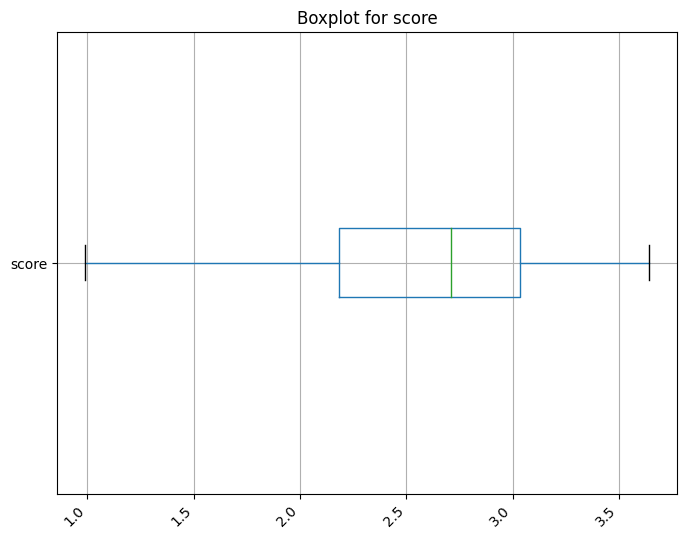

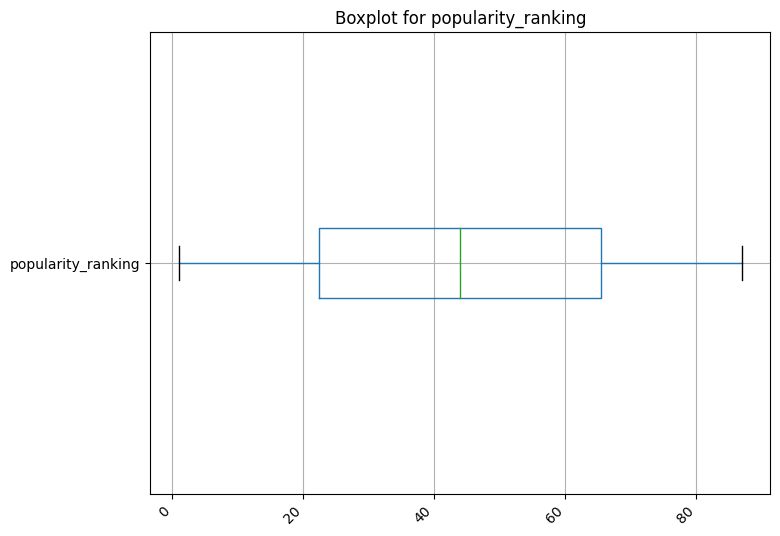

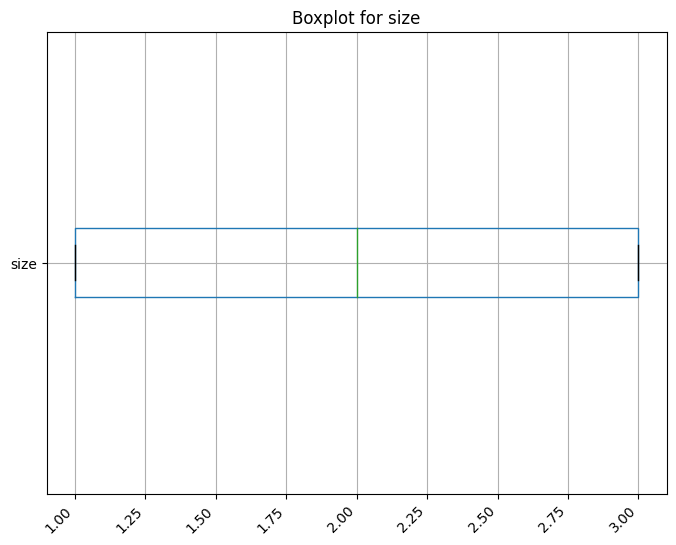

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

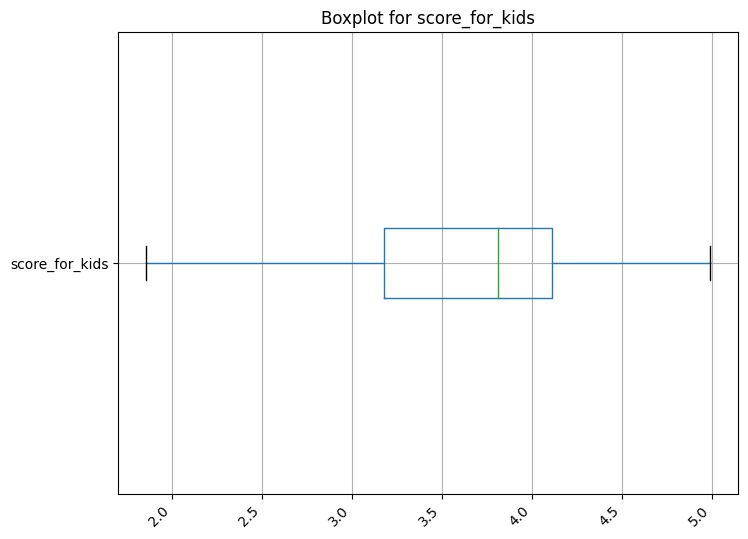

<Figure size 800x600 with 0 Axes>

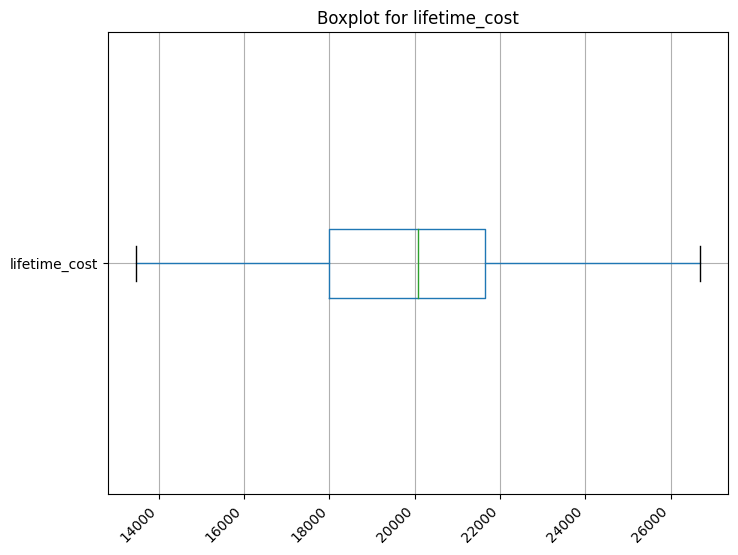

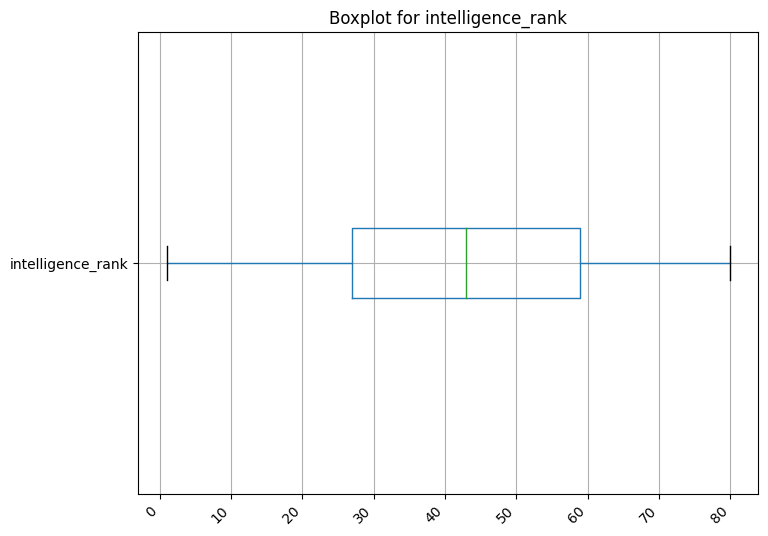

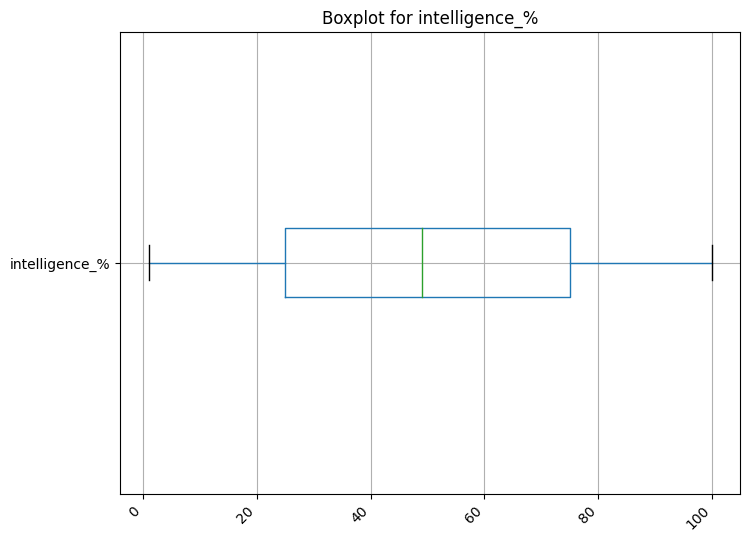

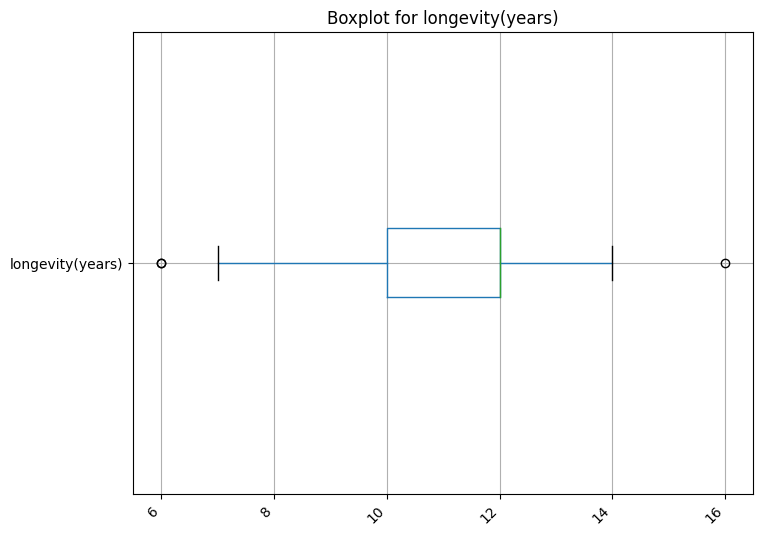

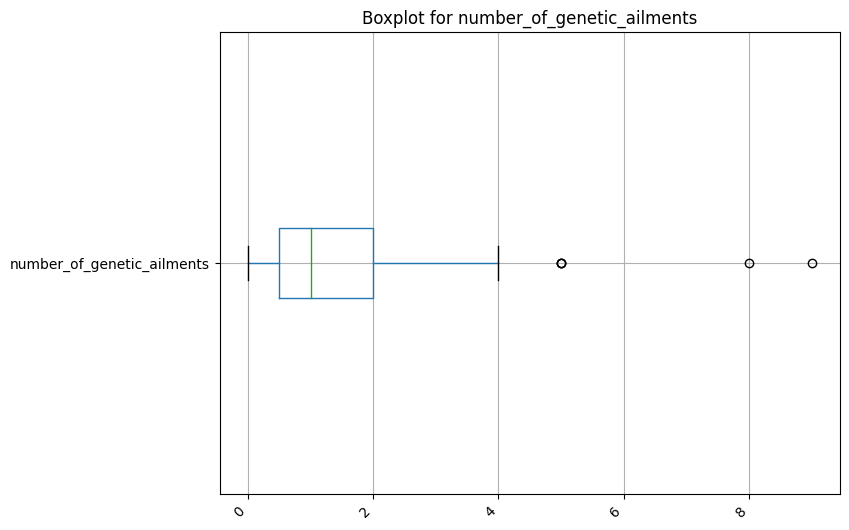

<Figure size 800x600 with 0 Axes>

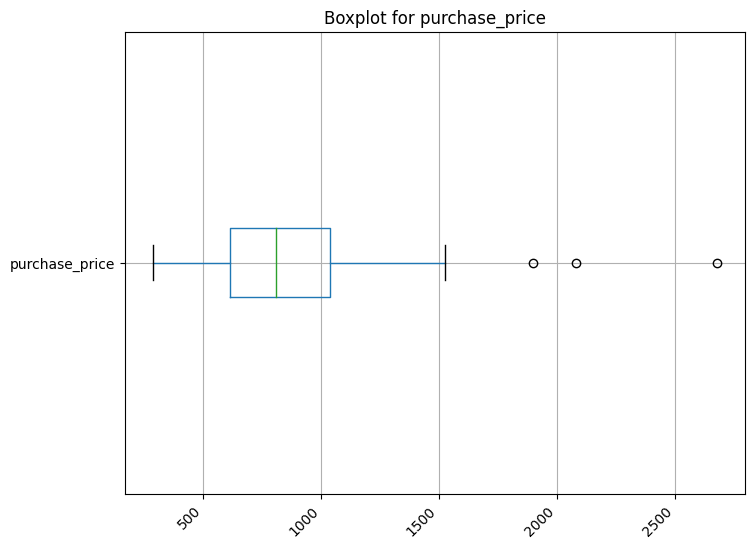

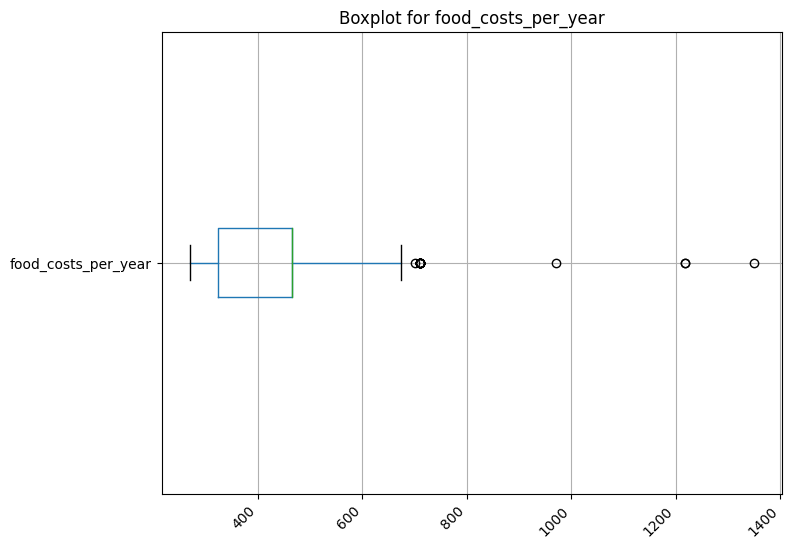

<Figure size 800x600 with 0 Axes>

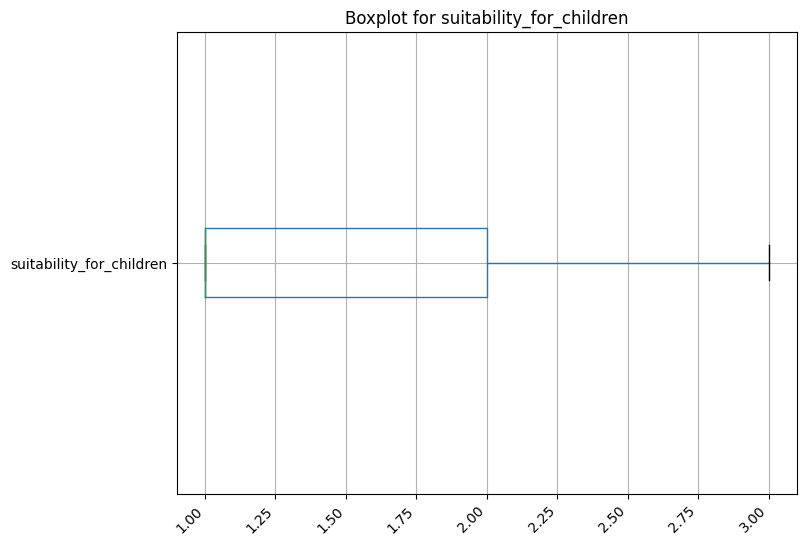

In [19]:
# Iterate through all columns and create boxplots for numerical columns
for column in df.columns:
    plt.figure(figsize=(8, 6))
    if df[column].dtype != 'object':  # Numerical column
        df.boxplot(column=column, vert=False)
        plt.title(f'Boxplot for {column}')
        plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
        plt.show()

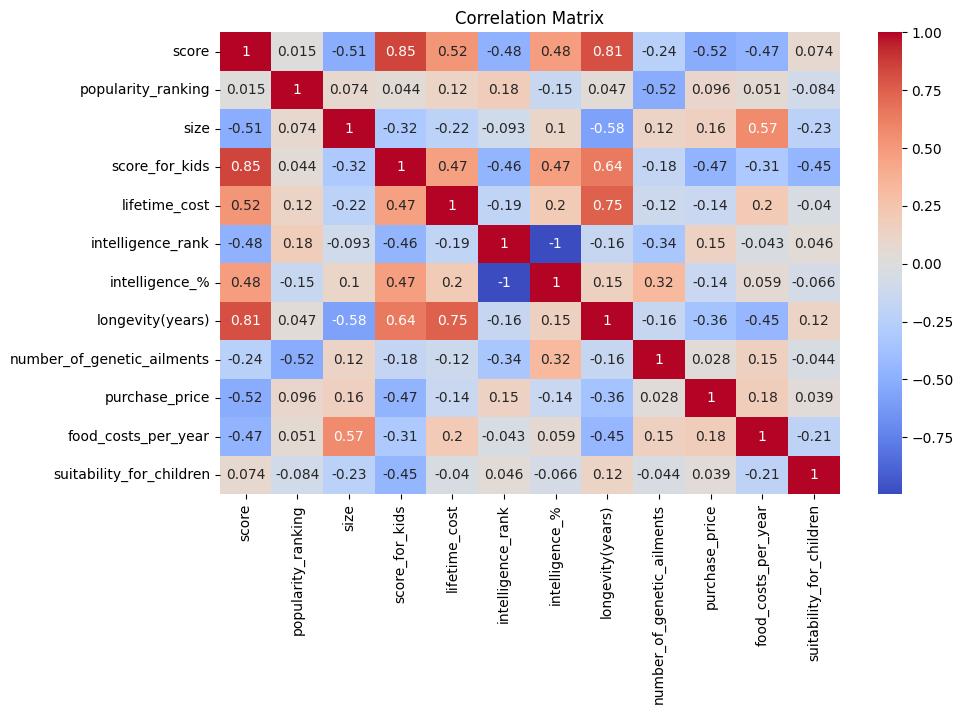

In [20]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
corr_data = df[numeric_cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_data, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

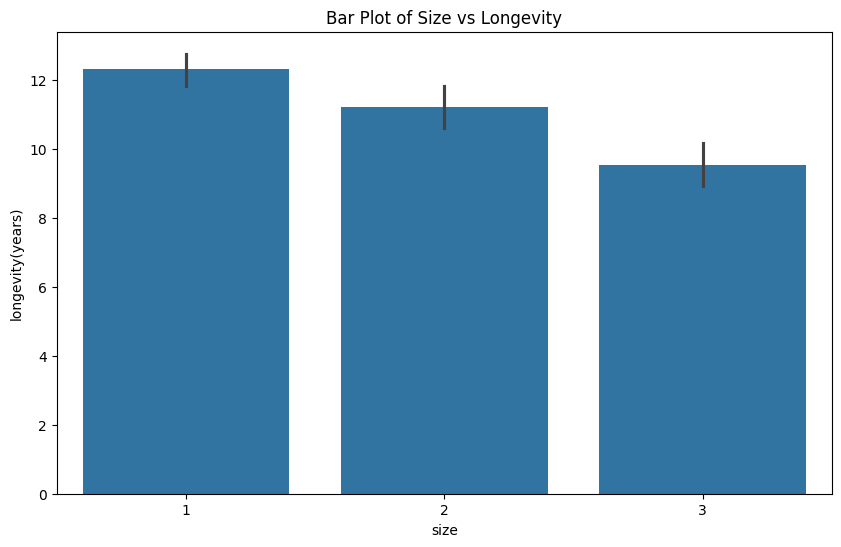

In [21]:
plt.figure(figsize=(10, 6))
sns.barplot(x='size', y='longevity(years)', data=df)
plt.title('Bar Plot of Size vs Longevity')
plt.show()

In [22]:
# Identify categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
categorical_columns

Index(['breed', 'type', 'intelligence', 'congential_ailments', 'size.1',
       'genetic_ailments', 'grooming_frequncy'],
      dtype='object')

In [23]:
#Take summary of the caegorical columns
df[categorical_columns].describe()

,breed,type,intelligence,congential_ailments,size.1,genetic_ailments,grooming_frequncy
count,87,87,87,87,87,87,87
unique,87,7,6,47,3,50,3
top,Border Terrier,sporting,Average,none,small,none,Once a week
freq,1,15,21,22,31,22,65


In [24]:
# Drop 'breed', 'congential_ailments', 'size.1', 'genetic_ailments'
data = df.copy()
data = data.drop(['breed', 'congential_ailments', 'size.1', 'genetic_ailments'], axis=1)

In [25]:
# Identify remaining categorical columns
categorical_columns = data.select_dtypes(include=['object']).columns

# Apply one-hot encoding to remaining categorical columns
for col in categorical_columns:
    ohe = OneHotEncoder(handle_unknown='ignore')
    encoded = pd.DataFrame(ohe.fit_transform(data[[col]]).toarray(),
                         columns=ohe.get_feature_names_out([col]))
    data = pd.concat([data, encoded], axis=1)
    data = data.drop(col, axis=1)

# Set options to display all columns
pd.set_option('display.max_columns', None)

# Now display the DataFrame
data.head()

,score,popularity_ranking,size,score_for_kids,lifetime_cost,intelligence_rank,intelligence_%,longevity(years),number_of_genetic_ailments,purchase_price,food_costs_per_year,suitability_for_children,type_herding,type_hound,type_non-sporting,type_sporting,type_terrier,type_toy,type_working,intelligence_Above average,intelligence_Average,intelligence_Brightest,intelligence_Excellent,intelligence_Fair,intelligence_Lowest,grooming_frequncy_Daily,grooming_frequncy_Once a week,grooming_frequncy_Once in a few weeks
0,3.61,61,1,4.99,22638,30,70,14,0,833,324,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3.53,48,1,4.91,21992,35,61,14,2,435,324,1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.22,16,2,4.72,22049,45,45,13,0,650,466,1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3.34,81,2,4.71,20224,31,69,12,1,750,324,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,3.33,51,2,4.70,18993,18,82,12,0,800,324,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


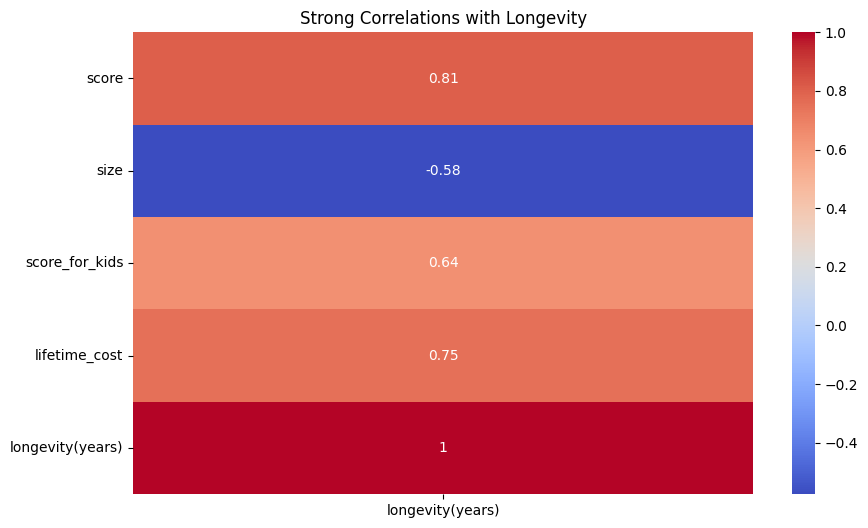

In [26]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
corr_data = data[numeric_cols].corr()

# Assuming 'longevity(years)' is the target variable
longevity_corr = corr_data['longevity(years)']

# Set a threshold for strong correlations (e.g., 0.5)
strong_corr = longevity_corr[(longevity_corr > 0.5) | (longevity_corr < -0.5)]

plt.figure(figsize=(10, 6))
sns.heatmap(strong_corr.to_frame(), annot=True, cmap='coolwarm')
plt.title('Strong Correlations with Longevity')
plt.show()

In [27]:
# get numeric features (int & float)
numeric_cols = data.select_dtypes(include=[np.number]).columns
corr_data = data[numeric_cols].corr()

# Select the correlation values for the specified columns and rows
corr_data.loc[['score', 'size', 'score_for_kids', 'lifetime_cost', 'longevity(years)'],
             ['score', 'size', 'score_for_kids', 'lifetime_cost', 'longevity(years)']]

,score,size,score_for_kids,lifetime_cost,longevity(years)
score,1.000000,-0.505688,0.851044,0.518920,0.808541
size,-0.505688,1.000000,-0.317110,-0.224104,-0.576118
score_for_kids,0.851044,-0.317110,1.000000,0.467339,0.642777
lifetime_cost,0.518920,-0.224104,0.467339,1.000000,0.749221
longevity(years),0.808541,-0.576118,0.642777,0.749221,1.000000


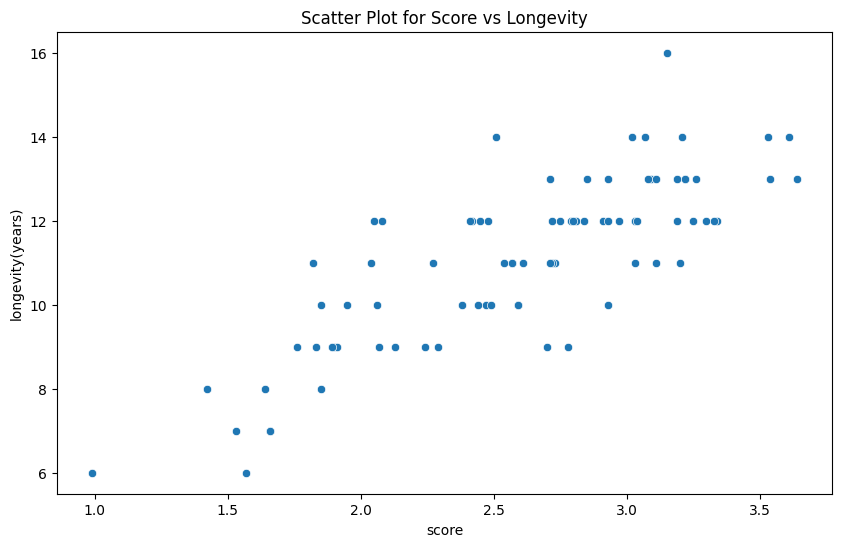

In [28]:
# Scatter plot for 'score' vs 'longevity(years)'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score', y='longevity(years)', data=data)
plt.title('Scatter Plot for Score vs Longevity')
plt.show()

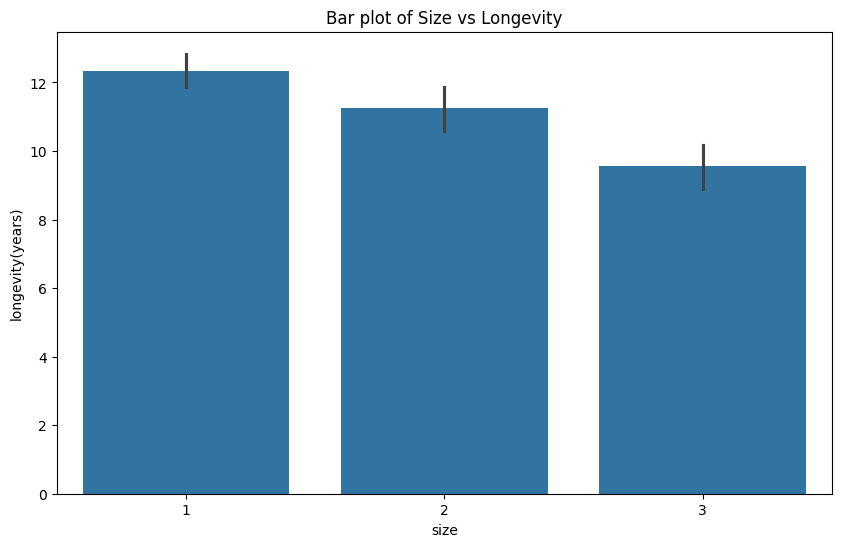

In [29]:
#Bar plot of longevity for each size category
plt.figure(figsize=(10, 6))
sns.barplot(x='size', y='longevity(years)', data=data)
plt.title('Bar plot of Size vs Longevity')
plt.show()

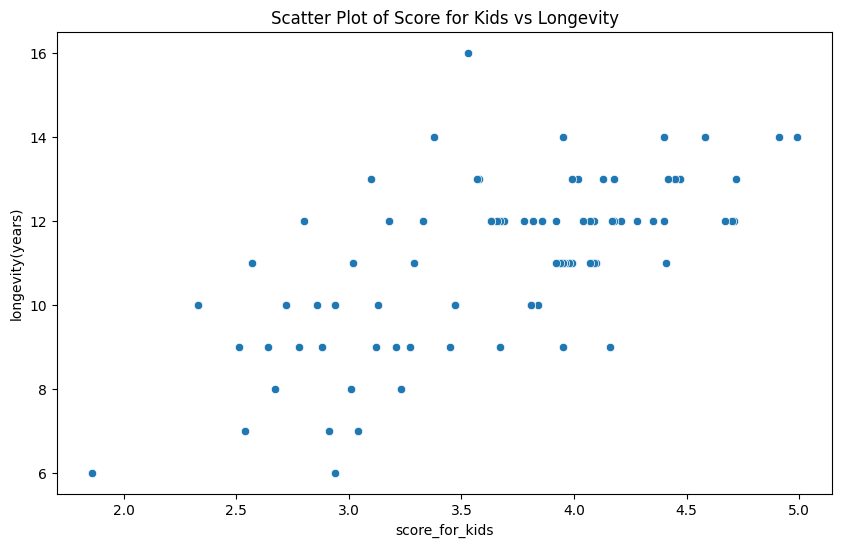

In [30]:
# Scatter plot for 'score_for_kids' vs 'longevity(years)'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='score_for_kids', y='longevity(years)', data=data)
plt.title('Scatter Plot of Score for Kids vs Longevity')
plt.show()

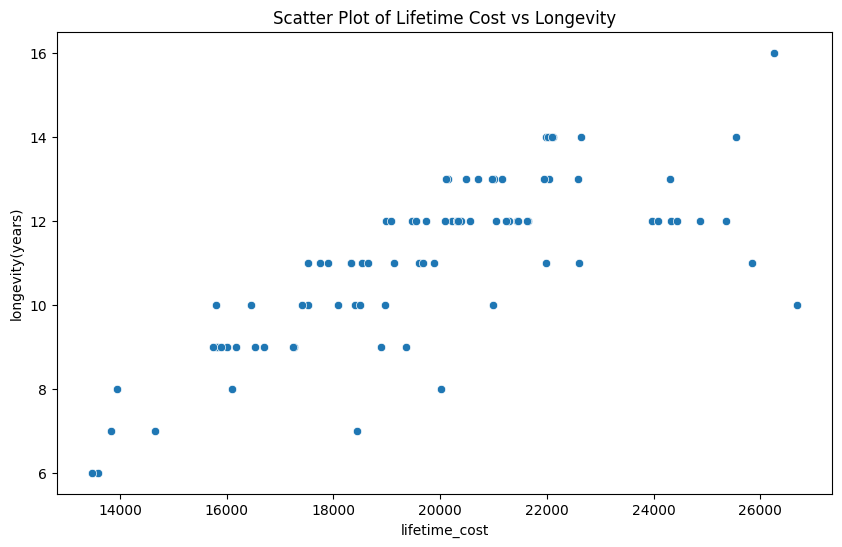

In [31]:
# Scatter plot for 'lifetime_cost' vs 'longevity(years)'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='lifetime_cost', y='longevity(years)', data=data)
plt.title('Scatter Plot of Lifetime Cost vs Longevity')
plt.show()

(0.0, 20.0)

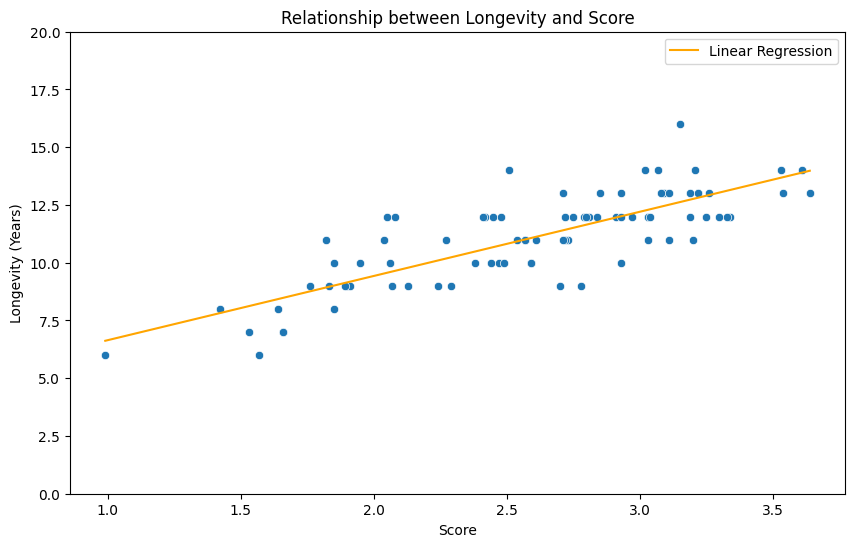

In [32]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y='longevity(years)', x='score', data=data)
plt.ylabel('Longevity (Years)')
plt.xlabel('Score')
plt.title('Relationship between Longevity and Score')

X = data['score'].values.reshape(-1,1)
y = data['longevity(years)'].values

# fit linear regression
lr = LinearRegression()
lr.fit(X, y)

# plot regression line
x_range = np.linspace(data['score'].min(), data['score'].max(), 100)
y_range = lr.predict(x_range.reshape(-1,1))
plt.plot(x_range, y_range, color= 'orange', label='Linear Regression')
plt.legend()
plt.ylim(0,20)

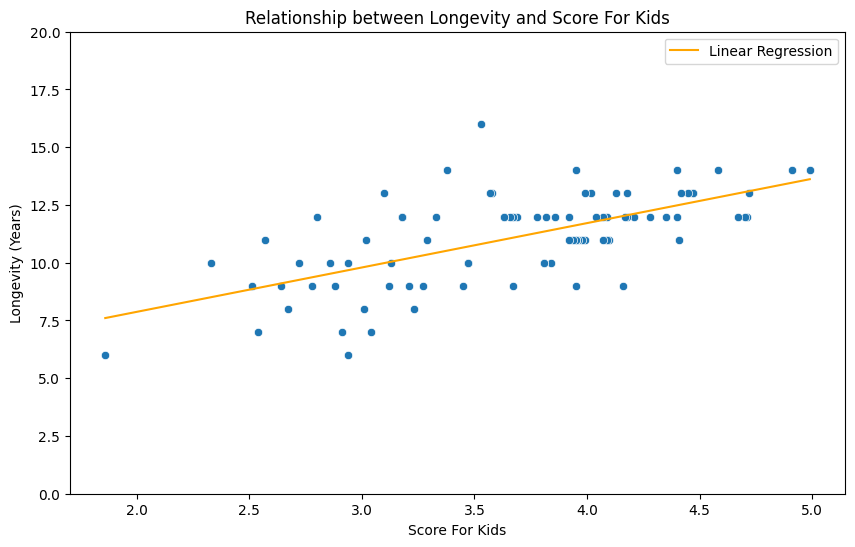

In [33]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y='longevity(years)', x='score_for_kids', data=data)
plt.ylabel('Longevity (Years)')
plt.xlabel('Score For Kids')
plt.title('Relationship between Longevity and Score For Kids')

X = data['score_for_kids'].values.reshape(-1,1)
y = data['longevity(years)'].values

# fit linear regression
lr = LinearRegression()
lr.fit(X, y)

# plot regression line
x_range = np.linspace(data['score_for_kids'].min(), data['score_for_kids'].max(), 100)
y_range = lr.predict(x_range.reshape(-1,1))
plt.plot(x_range, y_range, color= 'orange', label='Linear Regression')
plt.legend()
plt.ylim(0,20)
plt.show()

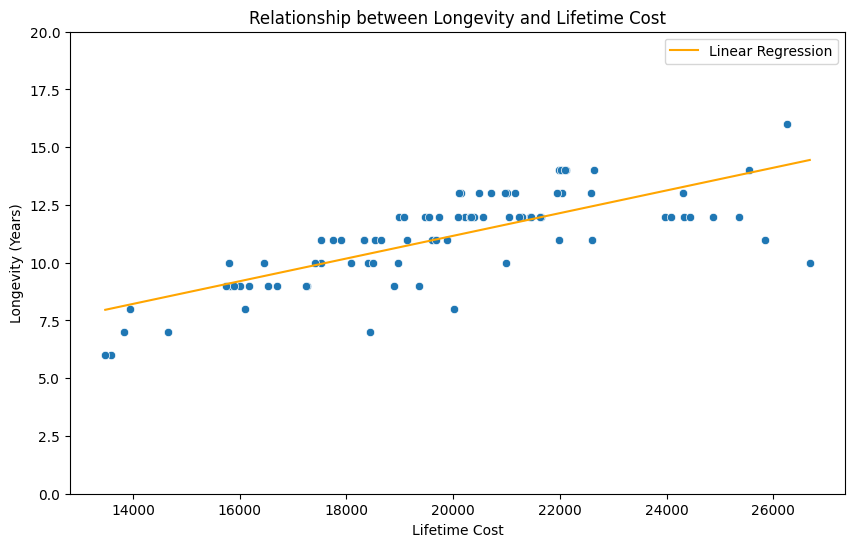

In [34]:
plt.figure(figsize=(10, 6))
sns.scatterplot(y='longevity(years)', x='lifetime_cost', data=data)
plt.ylabel('Longevity (Years)')
plt.xlabel('Lifetime Cost')
plt.title('Relationship between Longevity and Lifetime Cost')

X = data['lifetime_cost'].values.reshape(-1,1)
y = data['longevity(years)'].values

# fit linear regression
lr = LinearRegression()
lr.fit(X, y)

# plot regression line
x_range = np.linspace(data['lifetime_cost'].min(), data['lifetime_cost'].max(), 100)
y_range = lr.predict(x_range.reshape(-1,1))
plt.plot(x_range, y_range, color= 'orange', label='Linear Regression')
plt.legend()
plt.ylim(0,20)
plt.show()

In [35]:
def hist_box(data, features, figsize=(12,7), kde=False, bins=None):
    f2, (ax_box, ax_hist) = plt.subplots(
    nrows=2,
    sharex = True,
    gridspec_kw = {'height_ratios' : (0.25, 0.75)},
    figsize = figsize
    )
    sns.boxplot(data=data, x=features, ax=ax_box, showmeans=True, color='violet')
    sns.histplot(data=data, x=features, kde=kde, bins=bins, ax=ax_hist, color='green') if bins else sns.histplot(data=data, x=features, kde=kde, ax=ax_hist, color='green')
    ax_hist.axvline(data[features].mean(), color='red', linestyle='--')
    ax_hist.axvline(data[features].median(), color='blue', linestyle='-')

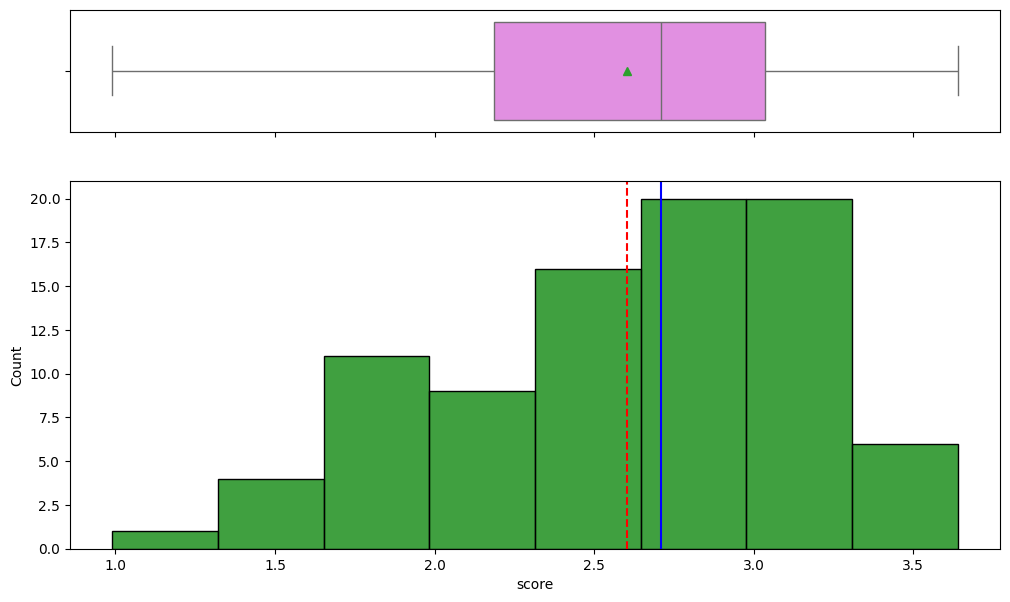

In [36]:
hist_box(data, 'score')

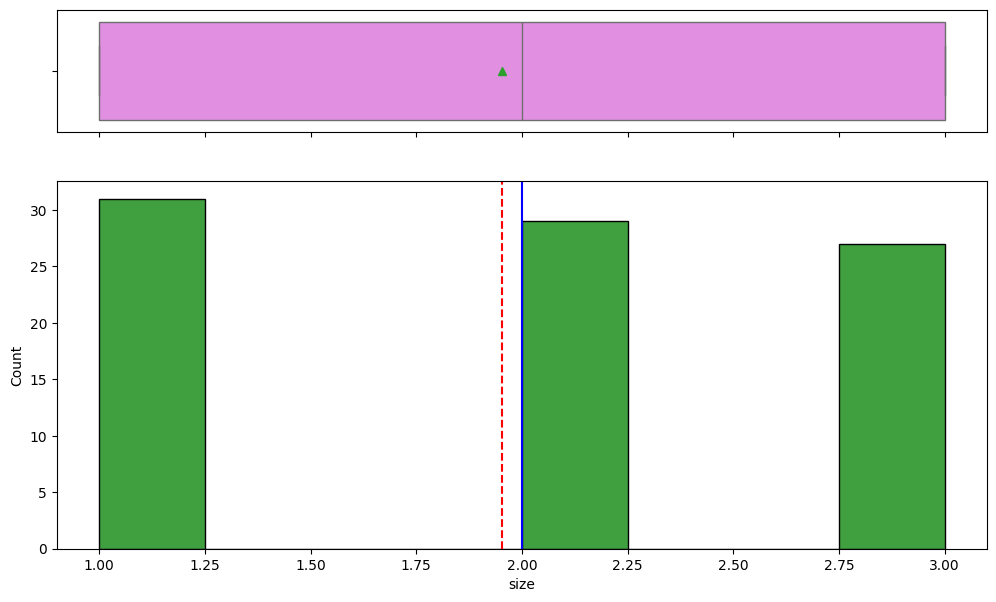

In [37]:
hist_box(data, 'size')

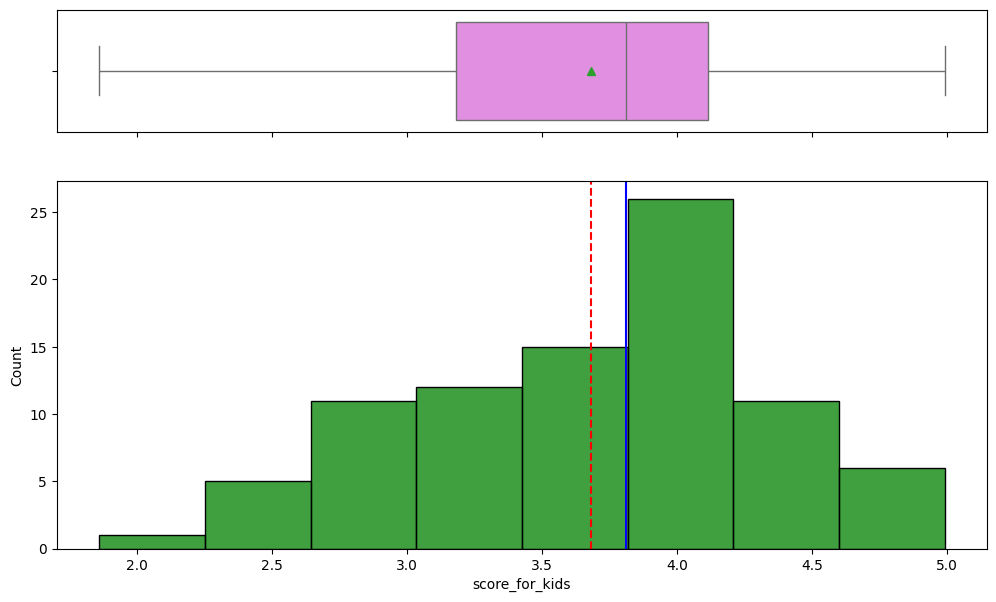

In [38]:
hist_box(data, 'score_for_kids')

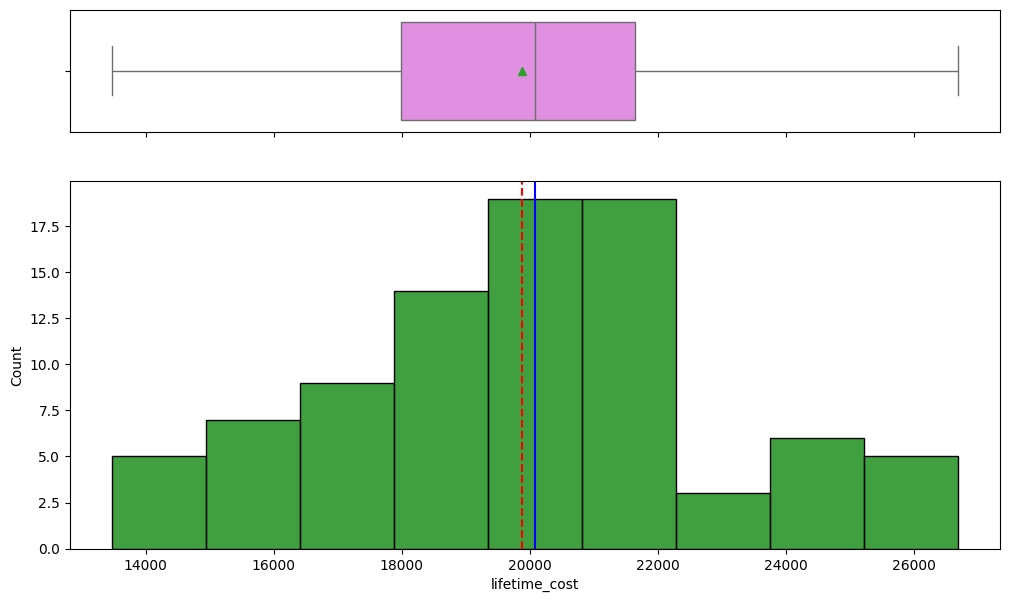

In [39]:
hist_box(data, 'lifetime_cost')

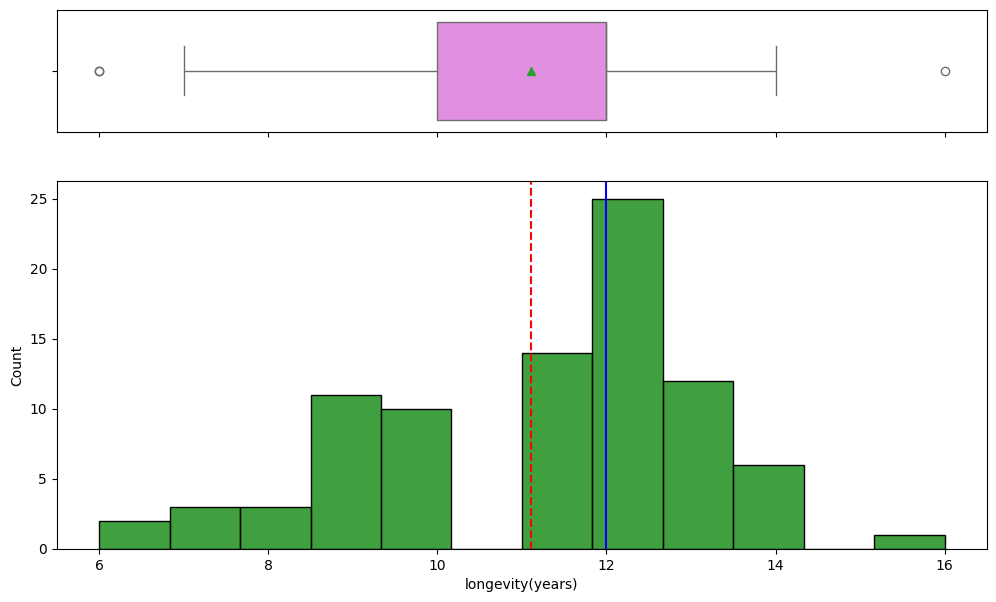

In [40]:
hist_box(data, 'longevity(years)')

In [41]:
# Select only the relevant columns for predicting longevity
selected_columns = ['score', 'size', 'score_for_kids', 'lifetime_cost', 'longevity(years)']
df1 = data[selected_columns].copy()

# Display the selected columns
print("Selected Features for Analysis:")
df1.head()



Selected Features for Analysis:


,score,size,score_for_kids,lifetime_cost,longevity(years)
0,3.61,1,4.99,22638,14
1,3.53,1,4.91,21992,14
2,3.22,2,4.72,22049,13
3,3.34,2,4.71,20224,12
4,3.33,2,4.70,18993,12


**Model Building**

In [42]:
# Select only the predictor columns
selected_columns = ['score', 'size', 'score_for_kids', 'lifetime_cost']
X = df1[selected_columns]
y = df1['longevity(years)']  # Target variable remains the same

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)  # Use the same scaler fitted on training data

print("X_train_scaled:\n", X_train_scaled)
print("\nX_test_scaled:\n", X_test_scaled)

X_train_scaled:
 [[0.60377358 1.         0.52786885 0.37237828]
 [0.21886792 1.         0.35409836 0.00772318]
 [0.76981132 1.         0.83606557 0.9360945 ]
 [0.8        0.5        0.69836066 0.56765352]
 [0.56226415 0.5        0.6557377  0.61868706]
 [1.         0.5        0.70819672 0.5045809 ]
 [0.78867925 0.         0.84918033 0.53085485]
 [0.5245283  1.         0.41639344 1.        ]
 [0.87169811 0.         0.92131148 0.82160975]
 [0.77358491 0.5        0.67540984 0.58741576]
 [0.61132075 0.5        0.69508197 0.32270766]
 [0.59622642 0.5        0.6852459  0.48512153]
 [0.7245283  0.5        0.6295082  0.60414931]
 [0.73207547 0.         0.63934426 0.1751344 ]
 [0.69811321 1.         0.7704918  0.51821004]
 [0.5509434  0.         0.64262295 0.79495722]
 [0.59622642 0.         0.6852459  0.3907019 ]
 [0.79245283 0.5        0.8557377  0.64109942]
 [0.53584906 0.5        0.59016393 0.86219429]
 [0.34339623 0.5        0.46229508 0.28674188]
 [0.68301887 0.5        0.75737705 0.603316

In [44]:
model = LinearRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression - Mean Squared Error:", mse)
print("Linear Regression - R-squared:", r2)

Linear Regression - Mean Squared Error: 0.2558587862873043
Linear Regression - R-squared: 0.936035303428174


In [45]:
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train_scaled, y_train)

y_pred_tree = tree_model.predict(X_test_scaled)
mse_tree = mean_squared_error(y_test, y_pred_tree)
r2_tree = r2_score(y_test, y_pred_tree)

print("Decision Tree - Mean Squared Error:", mse_tree)
print("Decision Tree - R-squared:", r2_tree)

Decision Tree - Mean Squared Error: 1.0555555555555556
Decision Tree - R-squared: 0.7361111111111112


In [46]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train_scaled, y_train)

y_pred_rf = rf_model.predict(X_test_scaled)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest - Mean Squared Error:", mse_rf)
print("Random Forest - R-squared:", r2_rf)

Random Forest - Mean Squared Error: 0.6851111111111114
Random Forest - R-squared: 0.8287222222222221


In [47]:
svr_model = SVR()
svr_model.fit(X_train_scaled, y_train)

y_pred_svr = svr_model.predict(X_test_scaled)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("SVR - Mean Squared Error:", mse_svr)
print("SVR - R-squared:", r2_svr)

SVR - Mean Squared Error: 0.5894487696714839
SVR - R-squared: 0.852637807582129


In [48]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train_scaled, y_train)

y_pred_xgb = xgb_model.predict(X_test_scaled)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("XGBoost - Mean Squared Error:", mse_xgb)
print("XGBoost - R-squared:", r2_xgb)

XGBoost - Mean Squared Error: 1.1190586044455004
XGBoost - R-squared: 0.720235348888625


In [49]:
# Polynomial features (squares)
X_train_poly = np.hstack((X_train_scaled, X_train_scaled**2))
X_test_poly = np.hstack((X_test_scaled, X_test_scaled**2))

# Interaction terms
X_train_interact = np.hstack((X_train_poly, (X_train_scaled[:, 0] * X_train_scaled[:, 1])[:, np.newaxis],
                                           (X_train_scaled[:, 0] * X_train_scaled[:, 2])[:, np.newaxis],
                                           (X_train_scaled[:, 1] * X_train_scaled[:, 2])[:, np.newaxis]))

X_test_interact = np.hstack((X_test_poly, (X_test_scaled[:, 0] * X_test_scaled[:, 1])[:, np.newaxis],
                                         (X_test_scaled[:, 0] * X_test_scaled[:, 2])[:, np.newaxis],
                                         (X_test_scaled[:, 1] * X_test_scaled[:, 2])[:, np.newaxis]))

In [50]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10]
}

rf_model = RandomForestRegressor(random_state=42)
grid_search_rf = GridSearchCV(rf_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_rf.fit(X_train_interact, y_train)

print("Best Hyperparameters (Random Forest):", grid_search_rf.best_params_)
best_rf_model = grid_search_rf.best_estimator_

Best Hyperparameters (Random Forest): {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 50}


In [51]:
param_grid_svr = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C': [0.1, 1, 10],
    'epsilon': [0.01, 0.1, 0.5]
}

svr_model = SVR()
grid_search_svr = GridSearchCV(svr_model, param_grid_svr, cv=5, scoring='neg_mean_squared_error')
grid_search_svr.fit(X_train_interact, y_train)

print("Best Hyperparameters (SVR):", grid_search_svr.best_params_)
best_svr_model = grid_search_svr.best_estimator_

Best Hyperparameters (SVR): {'C': 1, 'epsilon': 0.01, 'kernel': 'linear'}


In [52]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10, 20],

}

xgb_model = XGBRegressor(random_state=42)
grid_search_xgb = GridSearchCV(xgb_model, param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search_xgb.fit(X_train_interact, y_train)

print("Best Hyperparameters (XGBoost):", grid_search_xgb.best_params_)
best_xgb_model = grid_search_xgb.best_estimator_

Best Hyperparameters (XGBoost): {'max_depth': None, 'n_estimators': 50}


In [53]:
#Linear Regressor
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Random Forest
y_pred_rf = best_rf_model.predict(X_test_interact)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

# SVR
y_pred_svr = best_svr_model.predict(X_test_interact)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

# XGBoost
y_pred_xgb = best_xgb_model.predict(X_test_interact)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print("Linear Regression - MSE:", mse, " R-squared:", r2)
print("Random Forest - MSE:", mse_rf, " R-squared:", r2_rf)
print("SVR - MSE:", mse_svr, " R-squared:", r2_svr)
print("XGBoost - MSE:", mse_xgb, " R-squared:", r2_xgb)

Linear Regression - MSE: 0.2558587862873043  R-squared: 0.936035303428174
Random Forest - MSE: 0.8297997918696282  R-squared: 0.792550052032593
SVR - MSE: 0.39278788684107246  R-squared: 0.9018030282897319
XGBoost - MSE: 1.1355375616669283  R-squared: 0.7161156095832679


In [54]:
sample_data = { #1.76	2.51	15898
    'score': [3.61],
    'size': [1],
    'score_for_kids': [4.99],
    'lifetime_cost': [22638]
}
sample_df = pd.DataFrame(sample_data)

# Scale the sample
sample_scaled = scaler.transform(sample_df)

# Add engineered features (same as done for training data)
sample_poly = np.hstack((sample_scaled, sample_scaled**2))
sample_interact = np.hstack((sample_poly, (sample_scaled[:, 0] * sample_scaled[:, 1])[:, np.newaxis],
                                       (sample_scaled[:, 0] * sample_scaled[:, 2])[:, np.newaxis],
                                       (sample_scaled[:, 1] * sample_scaled[:, 2])[:, np.newaxis]))

# Predict using each model
predicted_model = model.predict(sample_scaled) # Use sample_scaled (4 features) instead of sample_interact (11 features)
predicted_rf = best_rf_model.predict(sample_interact)
predicted_svr = best_svr_model.predict(sample_interact)
predicted_xgb = best_xgb_model.predict(sample_interact)

print("Predicted Longevity (Linear Regression):", predicted_model[0])
print("Predicted Longevity (Random Forest):", predicted_rf[0])
print("Predicted Longevity (SVR):", predicted_svr[0])
print("Predicted Longevity (XGBoost):", predicted_xgb[0])

Predicted Longevity (Linear Regression): 13.858389295440272
Predicted Longevity (Random Forest): 13.48452380952381
Predicted Longevity (SVR): 14.368084406332478
Predicted Longevity (XGBoost): 12.819577


In [55]:
# Random Forest
cv_scores_rf = cross_val_score(best_rf_model, X_train_interact, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_rf = (-cv_scores_rf)**0.5
print("Random Forest - Cross-Validation RMSE:", cv_rmse_rf.mean())

# SVR
cv_scores_svr = cross_val_score(best_svr_model, X_train_interact, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_svr = (-cv_scores_svr)**0.5
print("SVR - Cross-Validation RMSE:", cv_rmse_svr.mean())

# XGBoost
cv_scores_xgb = cross_val_score(xgb_model, X_train_interact, y_train, cv=5, scoring='neg_mean_squared_error')
cv_rmse_xgb = (-cv_scores_xgb)**0.5
print("XGBoost - Cross-Validation RMSE:", cv_rmse_xgb.mean())


Random Forest - Cross-Validation RMSE: 0.9757319306752533
SVR - Cross-Validation RMSE: 0.9372208486866404
XGBoost - Cross-Validation RMSE: 1.0900159255865416


**5.Evaluation and Interpretation**

In [56]:
# Select SVR as the final model (assuming it has a lower RMSE)
y_pred_final = best_svr_model.predict(X_test_interact)
mse_final = mean_squared_error(y_test, y_pred_final)
r2_final = r2_score(y_test, y_pred_final)

print("Final Model (SVR) - MSE:", mse_final, " R-squared:", r2_final)

Final Model (SVR) - MSE: 0.39278788684107246  R-squared: 0.9018030282897319


In [57]:
import pickle

# Save the model
filename = 'svr_model.pkl'
pickle.dump(best_svr_model, open(filename, 'wb'))

In [58]:
# Load the model
loaded_model = pickle.load(open(filename, 'rb'))

# Sample new data (replace with your actual dataset)
new_data = pd.DataFrame({
    'score': [1.33],
    'size': [3],
    'score_for_kids': [2.70],
    'lifetime_cost': [1000]
})

# Scale and apply polynomial features to new data
new_data_scaled = scaler.transform(new_data)
new_data_poly = np.hstack((new_data_scaled, new_data_scaled**2))
new_data_interact = np.hstack((new_data_poly, (new_data_scaled[:, 0] * new_data_scaled[:, 1])[:, np.newaxis], (new_data_scaled[:, 0] * new_data_scaled[:, 2])[:, np.newaxis], (new_data_scaled[:, 1] * new_data_scaled[:, 2])[:, np.newaxis]))

# Make predictions on new data
predictions = loaded_model.predict(new_data_interact)

print("Predictions:", predictions)

Predictions: [6.11091939]


In [59]:
from sklearn.inspection import permutation_importance

# Assuming 'best_svr_model' is the trained SVR model and 'X_test_interact', 'y_test' are the test data
result = permutation_importance(best_svr_model, X_test_interact, y_test, n_repeats=10, random_state=42)

importances = result.importances_mean
feature_names = ['score', 'size', 'score_for_kids', 'lifetime_cost',
                 'score^2', 'size^2', 'score_for_kids^2', 'lifetime_cost^2',
                 'score*score_for_kids', 'score*lifetime_cost', 'score_for_kids*lifetime_cost']

sorted_idx = importances.argsort()[::-1]

print("Feature Importance:")
for idx in sorted_idx:
    print(f"{feature_names[idx]}: {importances[idx]:.3f}")

Feature Importance:
lifetime_cost: 0.134
score^2: 0.108
score: 0.091
size: 0.083
score_for_kids*lifetime_cost: 0.027
score*lifetime_cost: 0.025
size^2: 0.022
lifetime_cost^2: 0.022
score_for_kids: 0.000
score_for_kids^2: -0.001
score*score_for_kids: -0.007


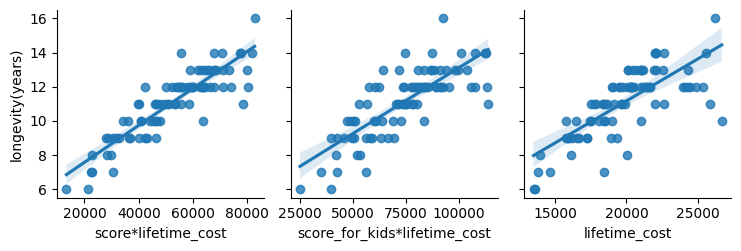

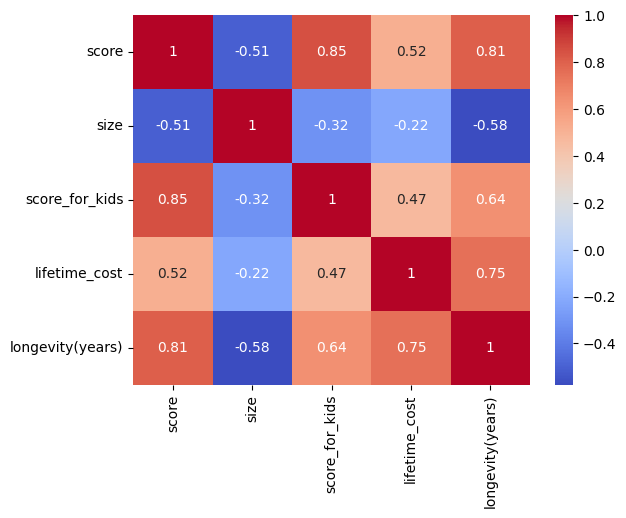

In [60]:
# Calculate the interaction terms and add them to the DataFrame
df1.loc[:, 'score*lifetime_cost'] = df1['score'] * df1['lifetime_cost']
df1.loc[:, 'score_for_kids*lifetime_cost'] = df1['score_for_kids'] * df1['lifetime_cost']

# Scatter plots with interaction terms (now that the columns exist)
sns.pairplot(df1, x_vars=['score*lifetime_cost', 'score_for_kids*lifetime_cost', 'lifetime_cost'],
             y_vars=['longevity(years)'], kind='reg')
plt.show()

# Heatmap to visualize correlations
corr_matrix = df1[['score', 'size', 'score_for_kids', 'lifetime_cost', 'longevity(years)']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [61]:
df1.tail()

,score,size,score_for_kids,lifetime_cost,longevity(years),score*lifetime_cost,score_for_kids*lifetime_cost
82,1.82,3,2.57,21986,11,40014.52,56504.02
83,1.66,3,2.54,13824,7,22947.84,35112.96
84,1.76,2,2.51,15898,9,27980.48,39903.98
85,1.95,3,2.33,20994,10,40938.30,48916.02
86,0.99,2,1.86,13479,6,13344.21,25070.94
